## Problem Statement
Predict the optimum number of clusters and represent it visually from the given ‘Iris’ dataset


## Approach
We will use K means clustering algorithm to solve this problem.

In [1]:
#import required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets


In [2]:
#load dataset
iris = datasets.load_iris()
df =pd.DataFrame(iris.data,columns=iris.feature_names)
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [3]:
#check the count of rows and columns
df.shape

(150, 4)

In [4]:
#Get complete info about the columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 4 columns):
sepal length (cm)    150 non-null float64
sepal width (cm)     150 non-null float64
petal length (cm)    150 non-null float64
petal width (cm)     150 non-null float64
dtypes: float64(4)
memory usage: 4.8 KB


In [5]:
#Get descriptive statistics
df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [13]:
#Check duplicate records
sum(df.duplicated())

1

In [14]:
#remove duplicate record
df.drop_duplicates()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [7]:
#Check null values in thee dataset  
df.isnull().sum()

sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
dtype: int64

In [8]:
#find optimum the no. of clusters
from sklearn.cluster import KMeans

SSE=[]
for i in range(1,10):
    kmeans= KMeans(n_clusters=i)
    kmeans.fit(df)
    SSE.append(kmeans.inertia_)

In [9]:
frame =pd.DataFrame({'Cluster':range(1,10),'SSE':SSE})

Text(0.5, 1.0, 'The elbow method')

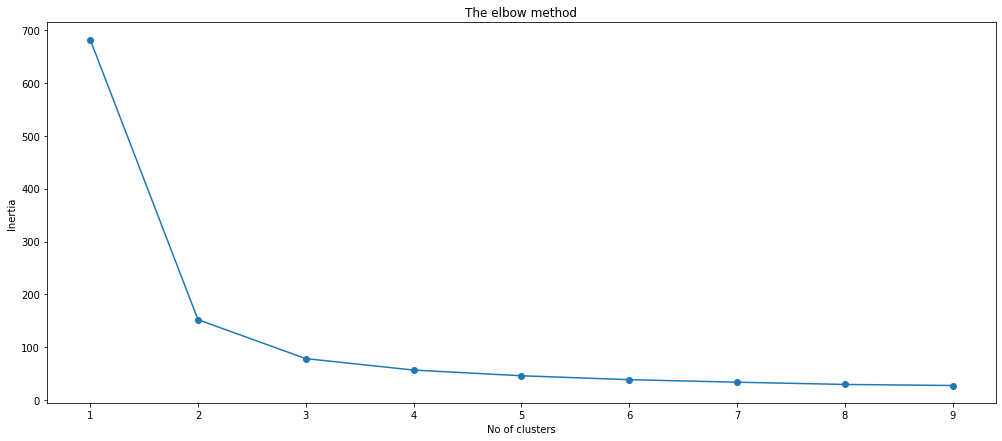

In [10]:
plt.figure(figsize=(17,7))
plt.plot(frame['Cluster'],frame['SSE'],marker='o')
plt.xlabel("No of clusters")
plt.ylabel("Inertia")
plt.title('The elbow method')


In elbow method we use that value after which decrease in inertia value is minimal or negligible.That's why we choose no of cluster as 3 after which value are not decreasing

In [11]:
#Prepare kmeans classifier and predict the diferent groups of Iris
x = df.iloc[:, [0, 1, 2, 3]].values
kmeans= KMeans(n_clusters=3)
kmeans.fit(x)
pred =kmeans.predict(x)
pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 2, 2, 2, 1, 2, 2, 2,
       2, 2, 2, 1, 1, 2, 2, 2, 2, 1, 2, 1, 2, 1, 2, 2, 1, 1, 2, 2, 2, 2,
       2, 1, 2, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 1])

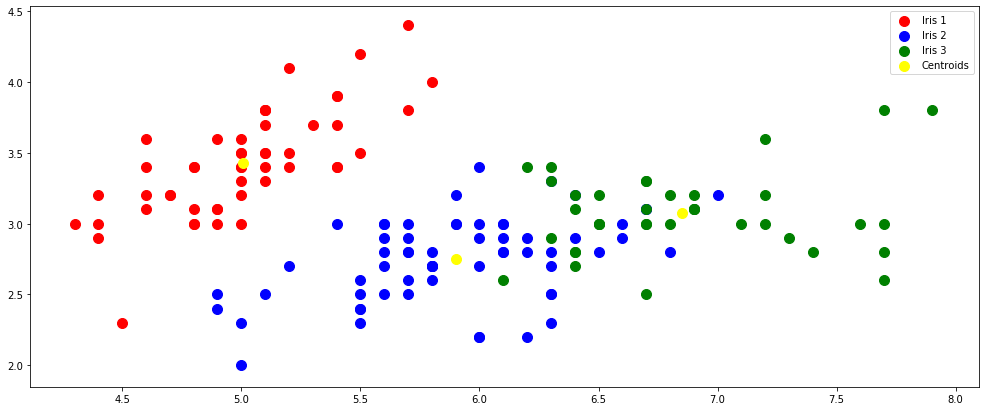

In [12]:
# Visualising the clusters - On the first two columns
plt.figure(figsize=(17,7))
plt.scatter(x[pred == 0, 0], x[pred == 0, 1], 
            s = 100, c = 'red', label = 'Iris 1')
plt.scatter(x[pred == 1, 0], x[pred == 1, 1], 
            s = 100, c = 'blue', label = 'Iris 2')
plt.scatter(x[pred == 2, 0], x[pred == 2, 1],
            s = 100, c = 'green', label = 'Iris 3')

#Plotting the centroids of the clusters
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], 
            s = 100, c = 'yellow', label = 'Centroids')

plt.legend()